<a href="https://colab.research.google.com/github/kharyal/EHDproj/blob/master/CIFAR10_vggPlusResnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [186]:
batch_size=64
mean = [0.4913997551666284, 0.48215855929893703, 0.4465309133731618]
std = [0.24703225141799082, 0.24348516474564, 0.26158783926049628]
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean,std)])
trainset=dsets.CIFAR10(root='./data',train=True,
                       transform=transform,
                       download=True)
testset=dsets.CIFAR10(root='./data',
                      train=False,
                     transform=transform)
train_batch=torch.utils.data.DataLoader(dataset=trainset,
                                       batch_size=batch_size,
                                       shuffle=True,
                                       num_workers=2)
test_batch=torch.utils.data.DataLoader(dataset=testset,
                                      batch_size=batch_size,
                                      shuffle=False,
                                      num_workers=2)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


(50000, 32, 32, 3)


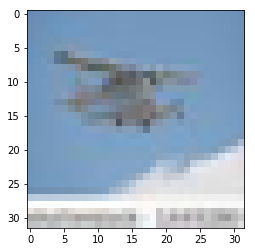

In [187]:
print(trainset.data.shape) # 50,000 images of 32*32*3 dimensions
plt.imshow(trainset.data[129])

In [0]:
class net(nn.Module):
  def __init__(self):
    super(net,self).__init__()
#     self.pad1=nn.ZeroPad2d()
    self.conv1=nn.Conv2d(3,16,3,stride=1,padding=1)
    self.conv2=nn.Conv2d(16,16,3,stride=1,padding=1)
    self.pool1=nn.MaxPool2d(2,2)
    self.conv3=nn.Conv2d(16,32,3,stride=1,padding=1)
    self.conv4=nn.Conv2d(32,32,3,stride=1,padding=1)    
    self.pool2=nn.MaxPool2d(2,2)
    self.conv5=nn.Conv2d(32,64,3,stride=1,padding=1)    
    self.conv6=nn.Conv2d(64,64,3,stride=1,padding=1)
    self.pool3=nn.MaxPool2d(2,2)
    self.conv7=nn.Conv2d(64,128,3,stride=1,padding=1)    
    self.conv8=nn.Conv2d(128,128,3,stride=1,padding=1)
    self.conv9=nn.Conv2d(128,256,3,stride=1,padding=1)    
    self.pool4=nn.MaxPool2d(2,2)
    self.conv10=nn.Conv2d(256,256,3,stride=1,padding=1)
    self.conv11=nn.Conv2d(256,256,3,stride=1,padding=1)
    self.conv12=nn.Conv2d(256,256,3,stride=1,padding=1)
    self.conv13=nn.Conv2d(256,256,3,stride=1,padding=1)
    self.conv14=nn.Conv2d(256,256,3,stride=1,padding=1)
    self.conv15=nn.Conv2d(256,256,3,stride=1,padding=1)
    self.conv16=nn.Conv2d(256,256,3,stride=1,padding=1)
    self.fc1=nn.Linear(1024,1024)
    self.fc2=nn.Linear(1024,1024)
    self.fc3=nn.Linear(1024,10)
    
  
  def forward(self,x):
    x=F.relu(self.conv1(x))
    x=F.relu(self.conv2(x))
    x=self.pool1(x)
    x=F.relu(self.conv3(x))
    x=F.relu(self.conv4(x))
    x=self.pool2(x)
    x=F.relu(self.conv5(x))
    x=F.relu(self.conv6(x))
    x=self.pool3(x)
    x=F.relu(self.conv7(x))
    x=F.relu(self.conv8(x))
    x=F.relu(self.conv9(x))
    x=self.pool4(x)
    x1=F.relu(self.conv10(x))
    x1=x+F.relu(self.conv11(x1))
    x2=F.relu(self.conv12(x1))
    x2=x1+F.relu(self.conv13(x2))
    x3=F.relu(self.conv14(x2))
    x3=x2+F.relu(self.conv15(x3))
    x=F.relu(self.conv16(x3))
    x=x.view(-1,x.size(1) * x.size(2) * x.size(3))
#     print(x.shape)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [0]:
network=net()
if torch.cuda.is_available():
  network.cuda()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(network.parameters(), lr=0.0001)

In [190]:
for epoch in range(15):
  lossTotal=0
  for i, (images, labels) in enumerate(train_batch):
    images=Variable(images).cuda()
    labels=Variable(labels).cuda()
    
    optimizer.zero_grad()
    op=network(images)
    loss=loss_function(op,labels)
    loss.backward()
    lossTotal=lossTotal+loss.item()
    optimizer.step()
    if i%100 ==0:
      print("local loss: ",loss.item())
  print("######## end of EPOCH: ",epoch+1," LOSS: ",lossTotal," ########")

local loss:  2.3024864196777344
local loss:  2.2386059761047363
local loss:  1.9003804922103882
local loss:  1.8787579536437988
local loss:  1.8701976537704468
local loss:  2.0208847522735596
local loss:  1.8484792709350586
local loss:  1.74893057346344
######## end of EPOCH:  1  LOSS:  1549.4711158275604  ########
local loss:  2.006174087524414
local loss:  1.8991669416427612
local loss:  1.802783727645874
local loss:  1.8323256969451904
local loss:  1.850560188293457
local loss:  1.6103293895721436
local loss:  1.6954292058944702
local loss:  1.7262121438980103
######## end of EPOCH:  2  LOSS:  1357.3904691934586  ########
local loss:  1.5127966403961182
local loss:  1.568825364112854
local loss:  1.5436170101165771
local loss:  1.4644930362701416
local loss:  1.6651376485824585
local loss:  1.473800778388977
local loss:  1.511129379272461
local loss:  1.5921701192855835
######## end of EPOCH:  3  LOSS:  1225.8101818561554  ########
local loss:  1.389676570892334
local loss:  1.53572

In [191]:
correct=0
total=0
for images,labels in test_batch:
  images=Variable(images).cuda()
  labels=Variable(labels).cuda()
  
  output = network(images)
  _, predicted = torch.max(output,1)
  correct += (predicted == labels).sum()
  total += labels.size(0)
print("accuracy: ",(100*correct)/(total+1))

accuracy:  tensor(68, device='cuda:0')
